Iteration 1/100, Best Distance: 304.98
Iteration 2/100, Best Distance: 290.31
Iteration 3/100, Best Distance: 290.31
Iteration 4/100, Best Distance: 290.31
Iteration 5/100, Best Distance: 290.31
Iteration 6/100, Best Distance: 290.31
Iteration 7/100, Best Distance: 290.31
Iteration 8/100, Best Distance: 290.31
Iteration 9/100, Best Distance: 290.31
Iteration 10/100, Best Distance: 290.31
Iteration 11/100, Best Distance: 290.31
Iteration 12/100, Best Distance: 290.31
Iteration 13/100, Best Distance: 290.31
Iteration 14/100, Best Distance: 290.31
Iteration 15/100, Best Distance: 290.31
Iteration 16/100, Best Distance: 290.31
Iteration 17/100, Best Distance: 290.31
Iteration 18/100, Best Distance: 290.31
Iteration 19/100, Best Distance: 290.31
Iteration 20/100, Best Distance: 290.31
Iteration 21/100, Best Distance: 290.31
Iteration 22/100, Best Distance: 290.31
Iteration 23/100, Best Distance: 290.31
Iteration 24/100, Best Distance: 290.31
Iteration 25/100, Best Distance: 290.31
Iteration

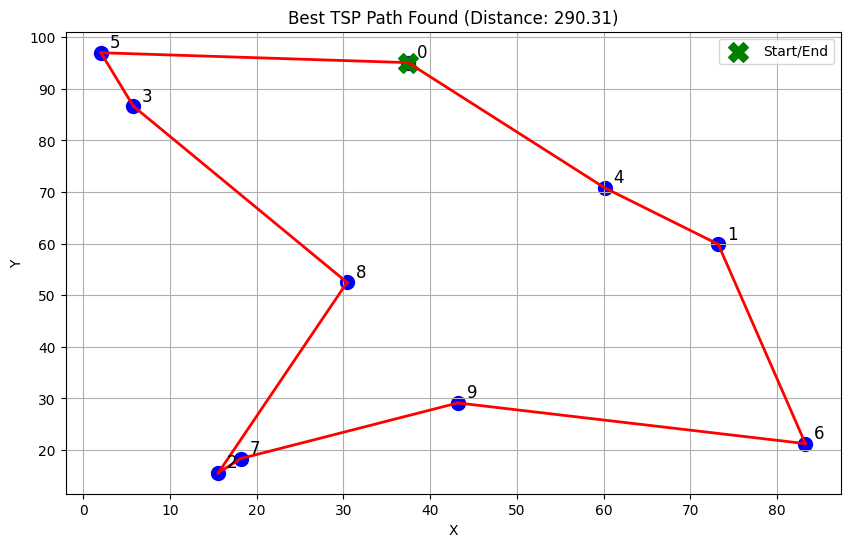

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# --- Parameters ---
NUM_CITIES = 10
NUM_ANTS = 20
NUM_ITERATIONS = 100
ALPHA = 1.0      # Influence of pheromone
BETA = 5.0       # Influence of distance
EVAPORATION = 0.5
Q = 100          # Pheromone deposit factor

# --- Generate Random Coordinates for Cities ---
np.random.seed(42)
coords = np.random.rand(NUM_CITIES, 2) * 100

# --- Distance and Heuristic ---
dist_matrix = np.linalg.norm(coords[:, np.newaxis, :] - coords[np.newaxis, :, :], axis=-1)
pheromone = np.ones((NUM_CITIES, NUM_CITIES)) * 0.1
eta = 1 / (dist_matrix + 1e-10)  # Avoid divide by zero

# --- ACO Function ---
def run_aco():
    best_distance = float('inf')
    best_path = []

    for iteration in range(NUM_ITERATIONS):
        all_paths = []
        all_distances = []

        for ant in range(NUM_ANTS):
            path = []
            visited = set()
            current_city = random.randint(0, NUM_CITIES - 1)
            path.append(current_city)
            visited.add(current_city)

            for _ in range(NUM_CITIES - 1):
                probabilities = []
                for next_city in range(NUM_CITIES):
                    if next_city not in visited:
                        tau = pheromone[current_city][next_city] ** ALPHA
                        eta_val = eta[current_city][next_city] ** BETA
                        probabilities.append((next_city, tau * eta_val))
                total = sum(p for _, p in probabilities)
                probs = [p[1] / total for p in probabilities]
                cities = [p[0] for p in probabilities]
                next_city = random.choices(cities, weights=probs, k=1)[0]
                path.append(next_city)
                visited.add(next_city)
                current_city = next_city

            path.append(path[0])  # Return to start
            distance = sum(dist_matrix[path[i]][path[i+1]] for i in range(NUM_CITIES))
            all_paths.append(path)
            all_distances.append(distance)

            if distance < best_distance:
                best_distance = distance
                best_path = path

        # Evaporation
        pheromone[:] *= (1 - EVAPORATION)

        # Pheromone update
        for i, path in enumerate(all_paths):
            for j in range(NUM_CITIES):
                from_city = path[j]
                to_city = path[j+1]
                pheromone[from_city][to_city] += Q / all_distances[i]
                pheromone[to_city][from_city] += Q / all_distances[i]

        print(f"Iteration {iteration+1}/{NUM_ITERATIONS}, Best Distance: {best_distance:.2f}")

    return best_path, best_distance

# --- Visualization ---
def visualize_path(coords, path, best_distance):
    plt.figure(figsize=(10, 6))
    x, y = coords[:, 0], coords[:, 1]
    plt.scatter(x, y, c='blue', s=100)

    # Draw path lines
    for i in range(len(path) - 1):
        c1 = path[i]
        c2 = path[i + 1]
        plt.plot([coords[c1][0], coords[c2][0]], [coords[c1][1], coords[c2][1]], 'r-', lw=2)

    # Highlight start/end
    plt.scatter(coords[path[0]][0], coords[path[0]][1], c='green', s=200, label="Start/End", marker='X')

    for i, (xi, yi) in enumerate(coords):
        plt.text(xi + 1, yi + 1, str(i), fontsize=12)

    plt.title(f"Best TSP Path Found (Distance: {best_distance:.2f})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()

# --- Run Everything ---
best_path, best_distance = run_aco()
visualize_path(coords, best_path, best_distance)
